Some typical NumPy 'random' functions:

In [1]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

[[0.72049162 0.65403691]
 [0.10658076 0.24347912]
 [0.97661305 0.71360647]]
[-1.04132917 -1.33989703  1.2578361  -0.19260367 -0.3511135 ]
[27 27 98 92 88 37 18 53 22 82]
[9 7 5]
[ 0.73231167 -2.20833783  0.97534134 -0.22397607  0.24647686 -2.86542752
  0.07030746 -1.65809528  0.20277089 -0.57236023]
None


AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [2]:
import pandas as pd
import numpy as np
import time

# 1. Generate a dataset of 1 million random data items between 1 and 100 using pandas
start_time_pandas = time.time()
pandas_data = pd.DataFrame(np.random.randint(1, 101, size=(1000000, 1)))
end_time_pandas = time.time()
pandas_time = end_time_pandas - start_time_pandas

# 2. Generate a dataset of 1 million random data items between 1 and 100 using NumPy
start_time_numpy = time.time()
numpy_data = np.random.randint(1, 101, size=1000000)
end_time_numpy = time.time()
numpy_time = end_time_numpy - start_time_numpy

# 3. Compare times
print(f"Pandas time: {pandas_time} seconds")
print(f"NumPy time: {numpy_time} seconds")
print("NumPy is faster" if numpy_time < pandas_time else "Pandas is faster")

Pandas time: 0.011421918869018555 seconds
NumPy time: 0.01227712631225586 seconds
Pandas is faster


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [3]:
import pandas as pd
import numpy as np
import time

file_path = 'sleep_health.csv'

start_time_pandas = time.time()

sleep_data_pandas = pd.read_csv(file_path)
mean_sleep_duration_pandas = sleep_data_pandas['Sleep Duration'].mean()
mean_systolic_bp_pandas = sleep_data_pandas['Systolic blood pressure'].mean()
mean_diastolic_bp_pandas = sleep_data_pandas['Diastolic blood pressure'].mean()
mean_heart_rate_pandas = sleep_data_pandas['Heart Rate'].mean()
mean_daily_steps_pandas = sleep_data_pandas['Daily Steps'].mean()

numeric_cols = sleep_data_pandas.select_dtypes(include=[np.number])
correlation_matrix_pandas = numeric_cols.corr()

sleep_age_corr_pandas = correlation_matrix_pandas.loc['Sleep Duration', 'Age']
sleep_heart_rate_corr_pandas = correlation_matrix_pandas.loc['Sleep Duration', 'Heart Rate']
sleep_steps_corr_pandas = correlation_matrix_pandas.loc['Sleep Duration', 'Daily Steps']

std_sleep_duration_pandas = sleep_data_pandas['Sleep Duration'].std()

end_time_pandas = time.time()
total_time_pandas = end_time_pandas - start_time_pandas

start_time_numpy = time.time()

data = np.genfromtxt(file_path, delimiter=',', skip_header=1, dtype=float, encoding=None)

age = data[:, 2]  # 'Age'
sleep_duration = data[:, 4]  # 'Sleep Duration'
systolic_bp = data[:, 10]  # 'Systolic blood pressure'
diastolic_bp = data[:, 11]  # 'Diastolic blood pressure'
heart_rate = data[:, 12]  # 'Heart Rate'
daily_steps = data[:, 13]  # 'Daily Steps'

mean_sleep_duration_numpy = np.mean(sleep_duration)
mean_systolic_bp_numpy = np.mean(systolic_bp)
mean_diastolic_bp_numpy = np.mean(diastolic_bp)
mean_heart_rate_numpy = np.mean(heart_rate)
mean_daily_steps_numpy = np.mean(daily_steps)

sleep_age_corr_numpy = np.corrcoef(sleep_duration, age)[0, 1]
sleep_heart_rate_corr_numpy = np.corrcoef(sleep_duration, heart_rate)[0, 1]
sleep_steps_corr_numpy = np.corrcoef(sleep_duration, daily_steps)[0, 1]

std_sleep_duration_numpy = np.std(sleep_duration)

end_time_numpy = time.time()
total_time_numpy = end_time_numpy - start_time_numpy

results = {
    "Pandas Mean Sleep Duration": mean_sleep_duration_pandas,
    "NumPy Mean Sleep Duration": mean_sleep_duration_numpy,
    "Pandas Mean Systolic BP": mean_systolic_bp_pandas,
    "NumPy Mean Systolic BP": mean_systolic_bp_numpy,
    "Pandas Sleep-Age Correlation": sleep_age_corr_pandas,
    "NumPy Sleep-Age Correlation": sleep_age_corr_numpy,
    "Pandas Sleep-Heart Rate Correlation": sleep_heart_rate_corr_pandas,
    "NumPy Sleep-Heart Rate Correlation": sleep_heart_rate_corr_numpy,
    "Pandas Std Sleep Duration": std_sleep_duration_pandas,
    "NumPy Std Sleep Duration": std_sleep_duration_numpy,
    "Time taken by Pandas": total_time_pandas,
    "Time taken by NumPy": total_time_numpy
}

print(pd.DataFrame([results]))

print(f"Time taken by Pandas: {total_time_pandas} seconds")
print(f"Time taken by NumPy: {total_time_numpy} seconds")
print("NumPy is faster" if total_time_numpy < total_time_pandas else "Pandas is faster")


   Pandas Mean Sleep Duration  NumPy Mean Sleep Duration  \
0                    7.132086                   7.132086   

   Pandas Mean Systolic BP  NumPy Mean Systolic BP  \
0               128.553476               84.649733   

   Pandas Sleep-Age Correlation  NumPy Sleep-Age Correlation  \
0                      0.344709                     0.344709   

   Pandas Sleep-Heart Rate Correlation  NumPy Sleep-Heart Rate Correlation  \
0                            -0.516455                           -0.039533   

   Pandas Std Sleep Duration  NumPy Std Sleep Duration  Time taken by Pandas  \
0                   0.795657                  0.794592               0.01704   

   Time taken by NumPy  
0             0.011109  
Time taken by Pandas: 0.017040252685546875 seconds
Time taken by NumPy: 0.011108636856079102 seconds
NumPy is faster


AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

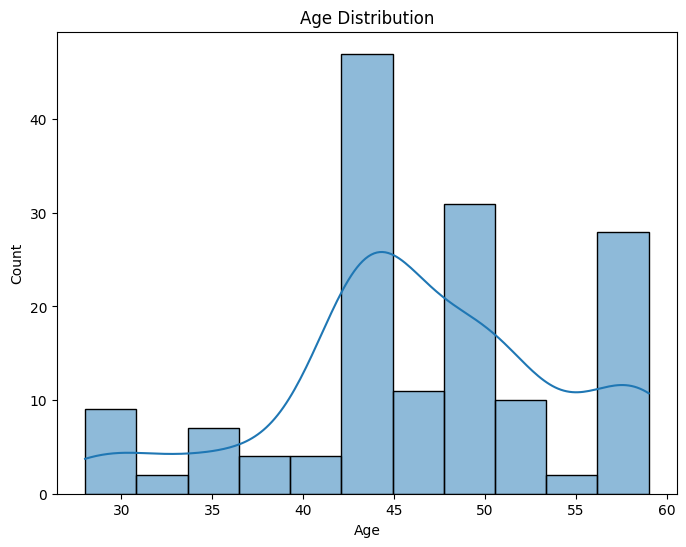

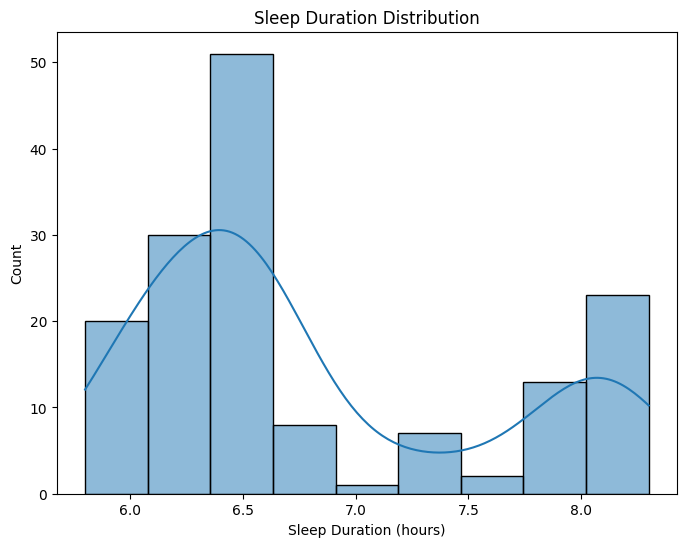

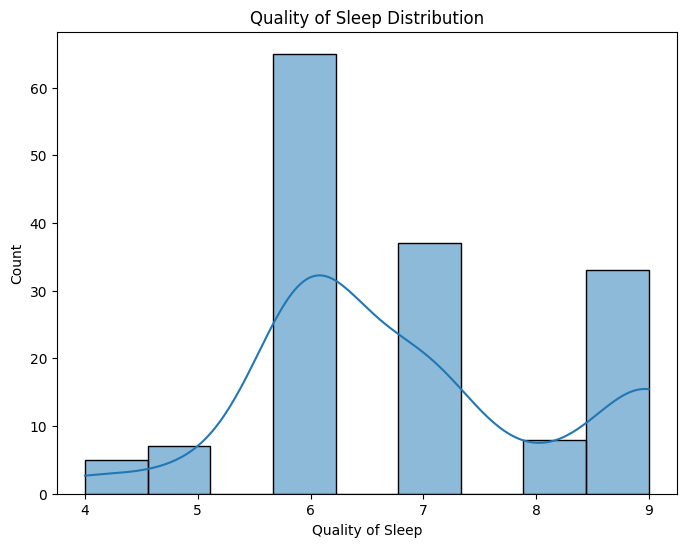

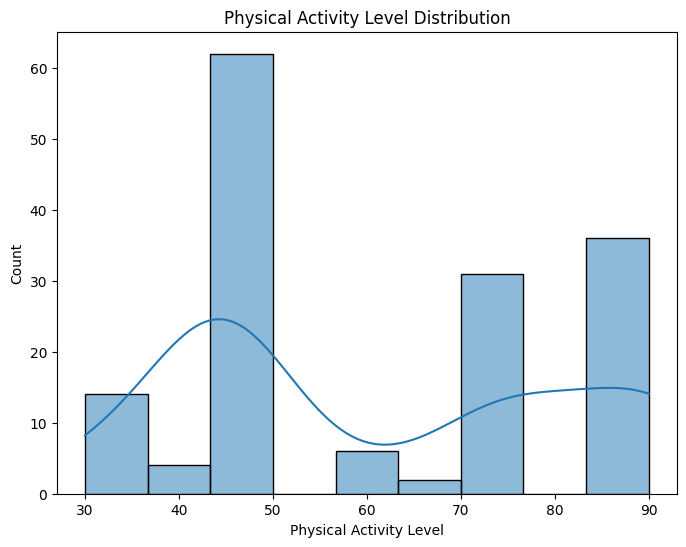

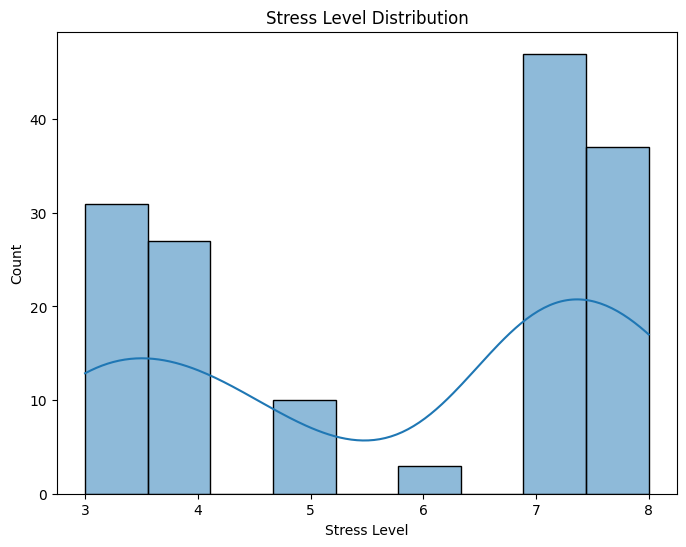

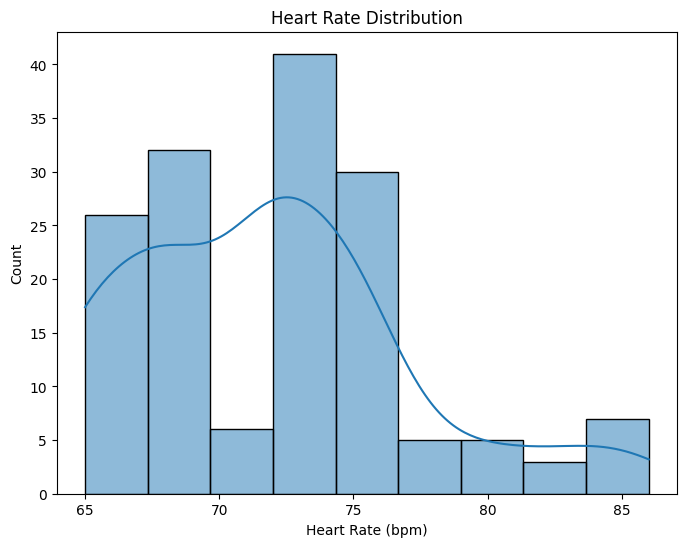

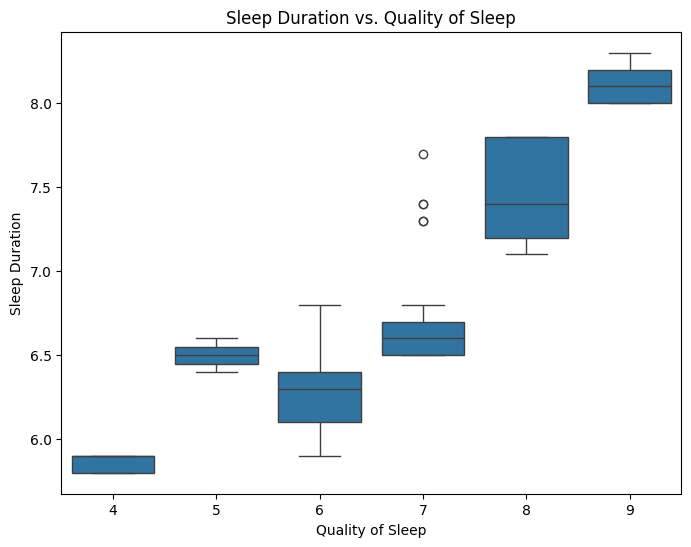

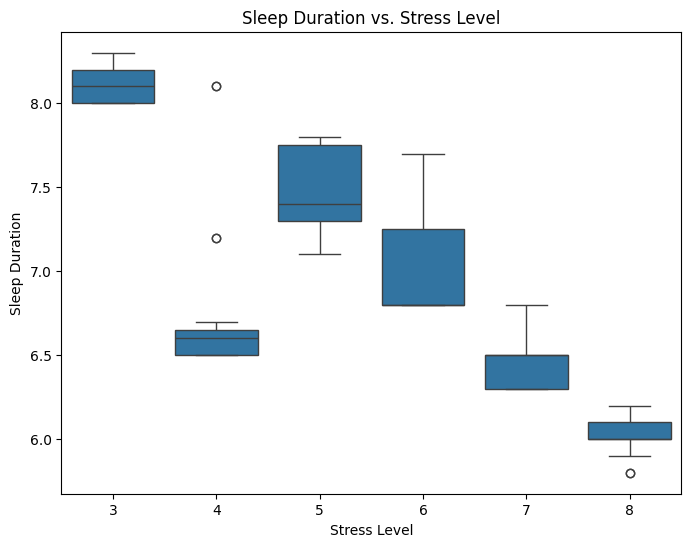

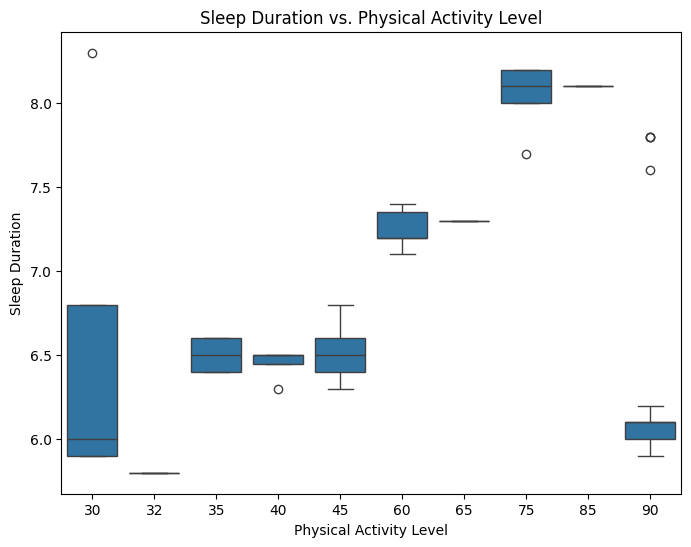

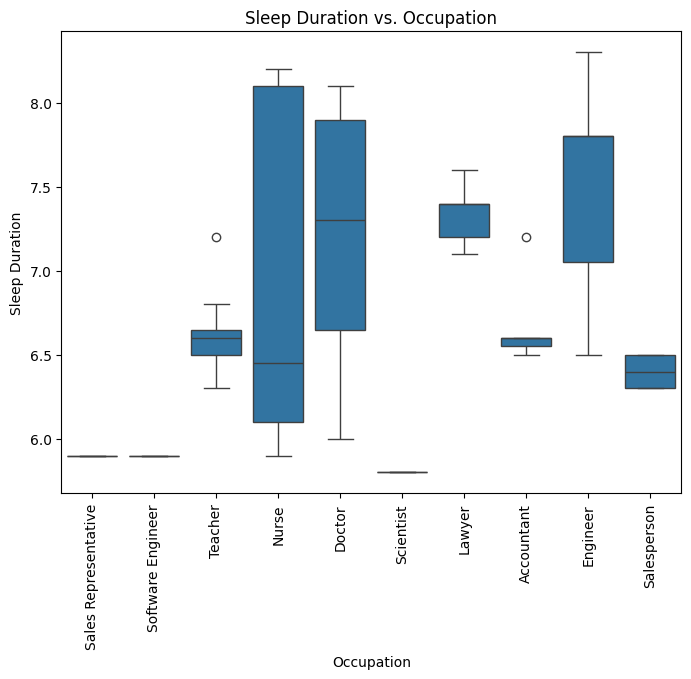

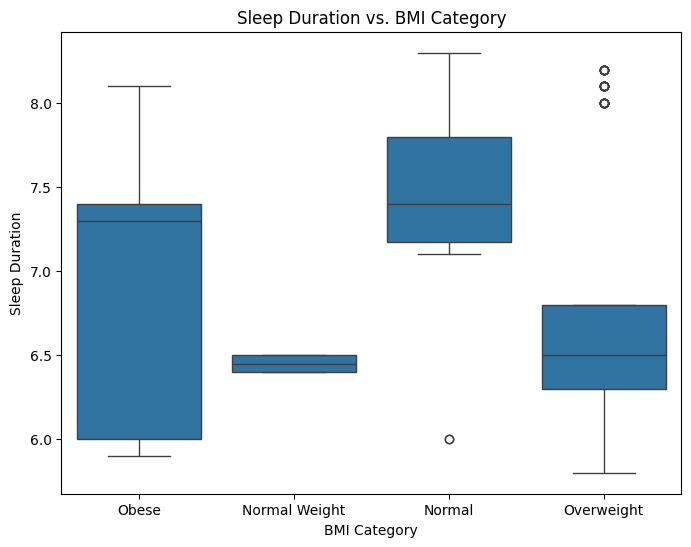

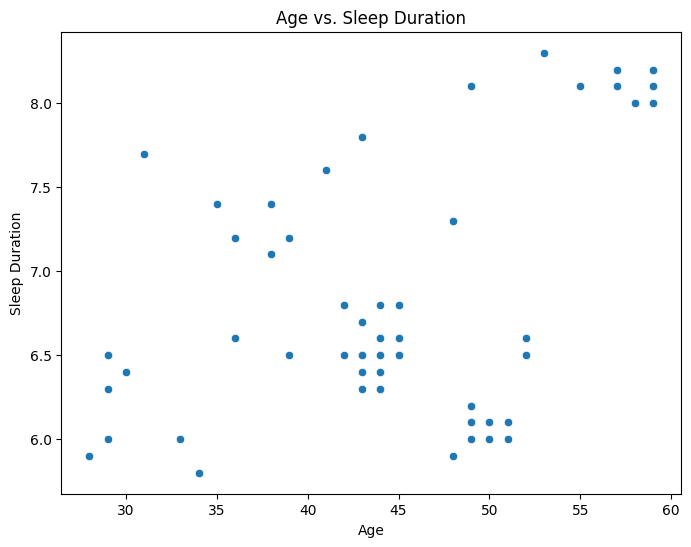

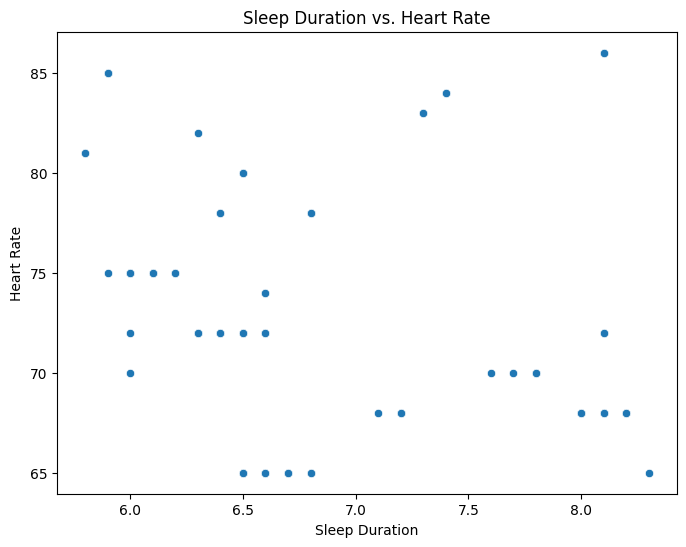

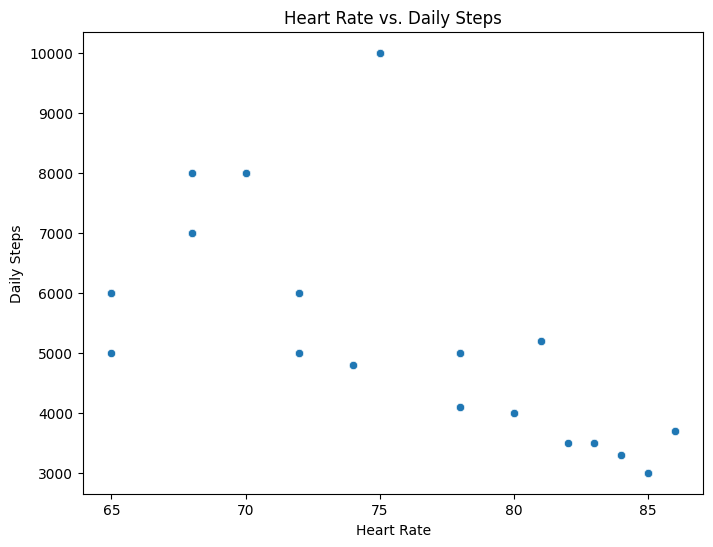

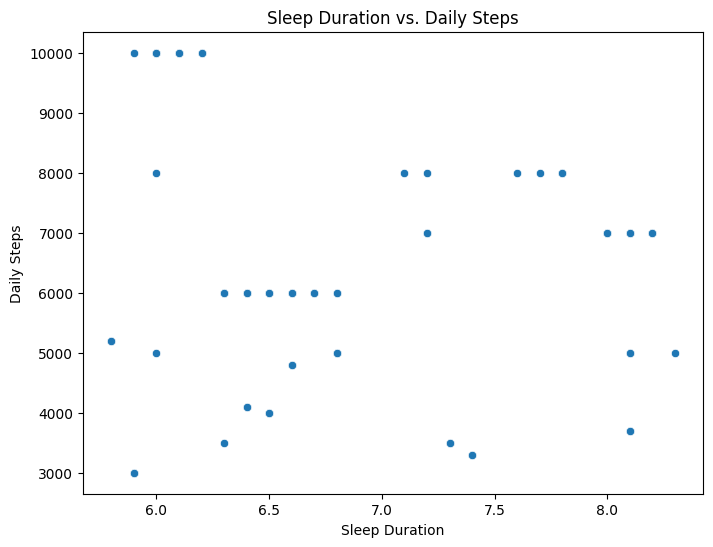

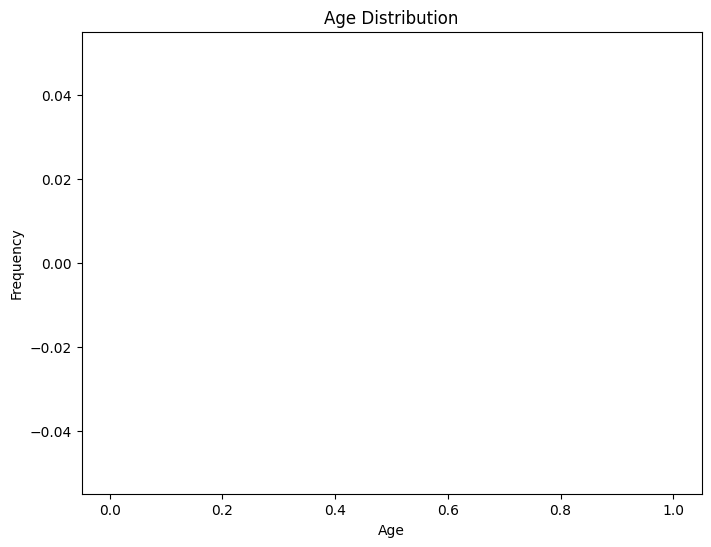

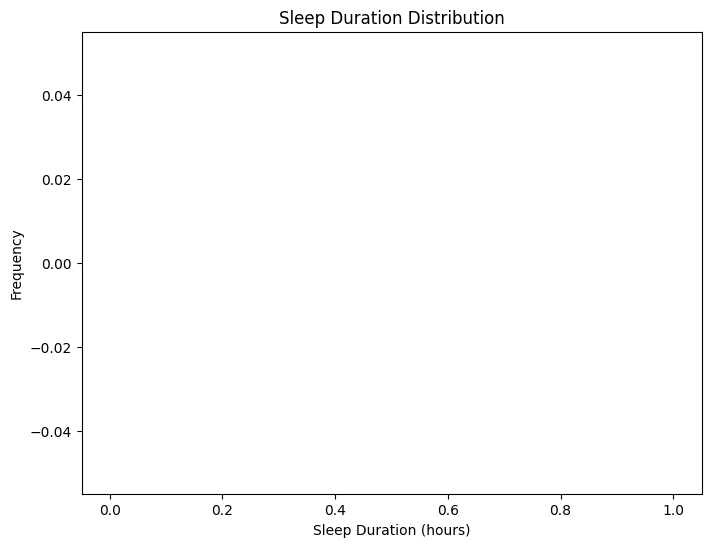

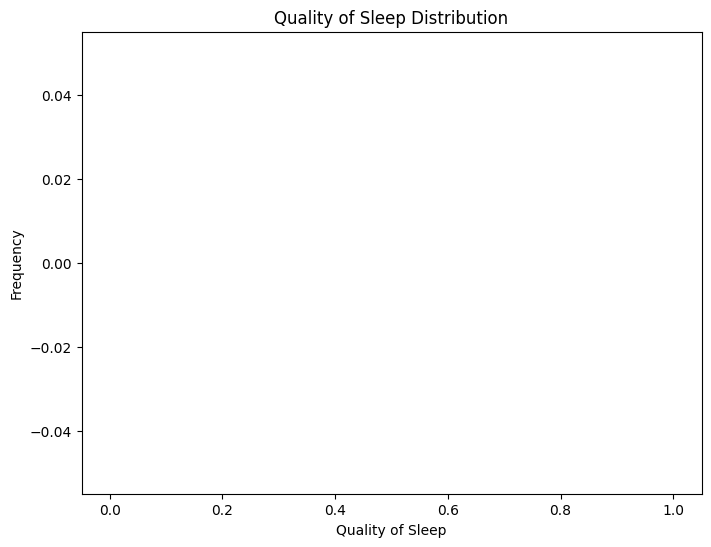

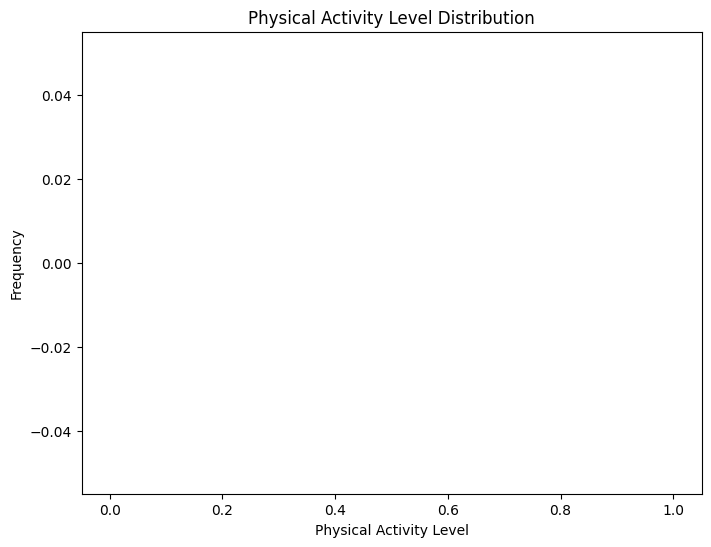

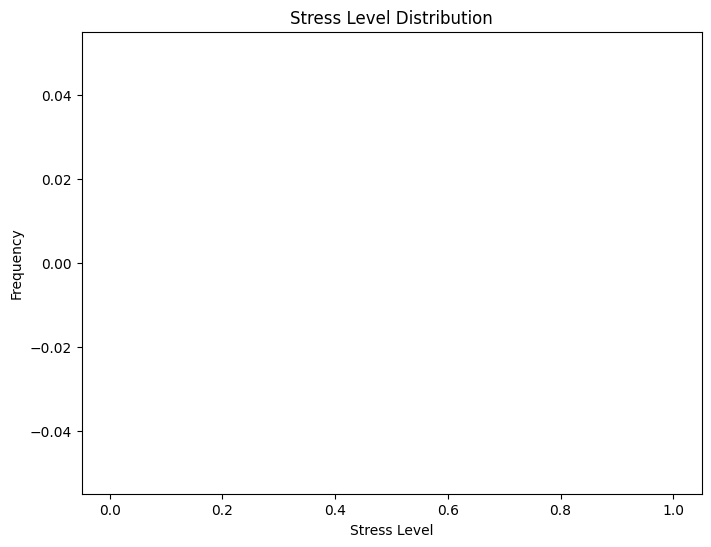

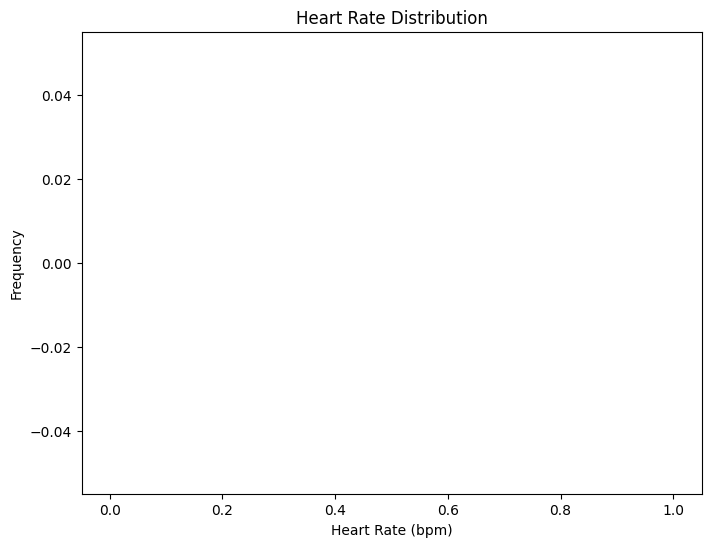

C:\Users\12465\AppData\Local\Temp\ipykernel_7792\2881663733.py:159: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sleep_duration_stress_groups, labels=stress_levels)


ValueError: Dimensions of labels and X must be compatible

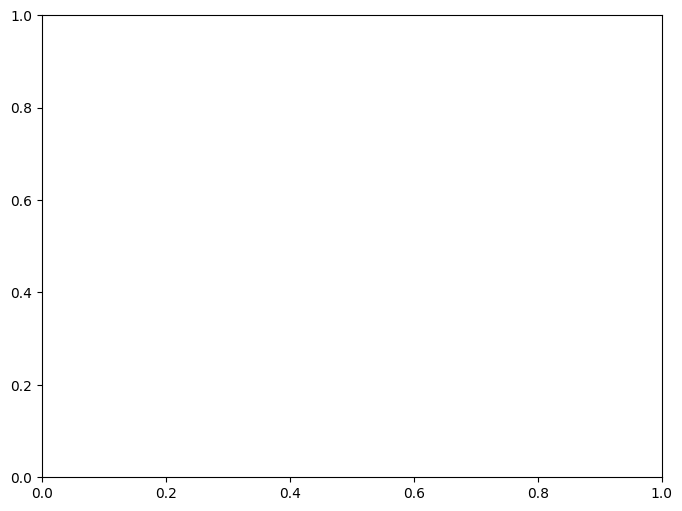

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time


file_path = 'sleep_health.csv'
sleep_data = pd.read_csv(file_path)


sleep_data_clean = sleep_data.dropna()

start_time_pandas = time.time()

plt.figure(figsize=(8, 6))
sns.histplot(sleep_data_clean['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(sleep_data_clean['Sleep Duration'], kde=True)
plt.title('Sleep Duration Distribution')
plt.xlabel('Sleep Duration (hours)')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(sleep_data_clean['Quality of Sleep'], kde=True)
plt.title('Quality of Sleep Distribution')
plt.xlabel('Quality of Sleep')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(sleep_data_clean['Physical Activity Level'], kde=True)
plt.title('Physical Activity Level Distribution')
plt.xlabel('Physical Activity Level')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(sleep_data_clean['Stress Level'], kde=True)
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(sleep_data_clean['Heart Rate'], kde=True)
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate (bpm)')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Quality of Sleep', y='Sleep Duration', data=sleep_data_clean)
plt.title('Sleep Duration vs. Quality of Sleep')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Stress Level', y='Sleep Duration', data=sleep_data_clean)
plt.title('Sleep Duration vs. Stress Level')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Physical Activity Level', y='Sleep Duration', data=sleep_data_clean)
plt.title('Sleep Duration vs. Physical Activity Level')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Occupation', y='Sleep Duration', data=sleep_data_clean)
plt.title('Sleep Duration vs. Occupation')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='BMI Category', y='Sleep Duration', data=sleep_data_clean)
plt.title('Sleep Duration vs. BMI Category')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Sleep Duration', data=sleep_data_clean)
plt.title('Age vs. Sleep Duration')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sleep Duration', y='Heart Rate', data=sleep_data_clean)
plt.title('Sleep Duration vs. Heart Rate')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Heart Rate', y='Daily Steps', data=sleep_data_clean)
plt.title('Heart Rate vs. Daily Steps')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sleep Duration', y='Daily Steps', data=sleep_data_clean)
plt.title('Sleep Duration vs. Daily Steps')
plt.show()

end_time_pandas = time.time()

start_time_numpy = time.time()

data = np.genfromtxt(file_path, delimiter=',', skip_header=1, dtype=float)
data = data[~np.isnan(data).any(axis=1)] 

age = data[:, 2]
sleep_duration = data[:, 4]
quality_of_sleep = data[:, 6]
physical_activity_level = data[:, 7]
stress_level = data[:, 8]
heart_rate = data[:, 12]
daily_steps = data[:, 13]

plt.figure(figsize=(8, 6))
plt.hist(age, bins=30, alpha=0.7, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(sleep_duration, bins=30, alpha=0.7, color='green')
plt.title('Sleep Duration Distribution')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(quality_of_sleep, bins=30, alpha=0.7, color='orange')
plt.title('Quality of Sleep Distribution')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(physical_activity_level, bins=30, alpha=0.7, color='red')
plt.title('Physical Activity Level Distribution')
plt.xlabel('Physical Activity Level')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(stress_level, bins=30, alpha=0.7, color='purple')
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(heart_rate, bins=30, alpha=0.7, color='cyan')
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.show()

stress_levels = np.unique(stress_level)
sleep_duration_stress_groups = [sleep_duration[stress_level == i] for i in stress_levels]

plt.figure(figsize=(8, 6))
plt.boxplot(sleep_duration_stress_groups, labels=stress_levels)
plt.title('Sleep Duration vs. Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(age, sleep_duration, alpha=0.7, color='blue')
plt.title('Age vs. Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration (hours)')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(sleep_duration, heart_rate, alpha=0.7, color='green')
plt.title('Sleep Duration vs. Heart Rate')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Heart Rate (bpm)')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(heart_rate, daily_steps, alpha=0.7, color='red')
plt.title('Heart Rate vs. Daily Steps')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Daily Steps')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(sleep_duration, daily_steps, alpha=0.7, color='purple')
plt.title('Sleep Duration vs. Daily Steps')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Daily Steps')
plt.show()

end_time_numpy = time.time()

print(f"Time taken by Pandas: {end_time_pandas - start_time_pandas} seconds")
print(f"Time taken by NumPy: {end_time_numpy - start_time_numpy} seconds")
print("NumPy is faster" if (end_time_numpy - start_time_numpy) < (end_time_pandas - start_time_pandas) else "Pandas is faster")

AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy



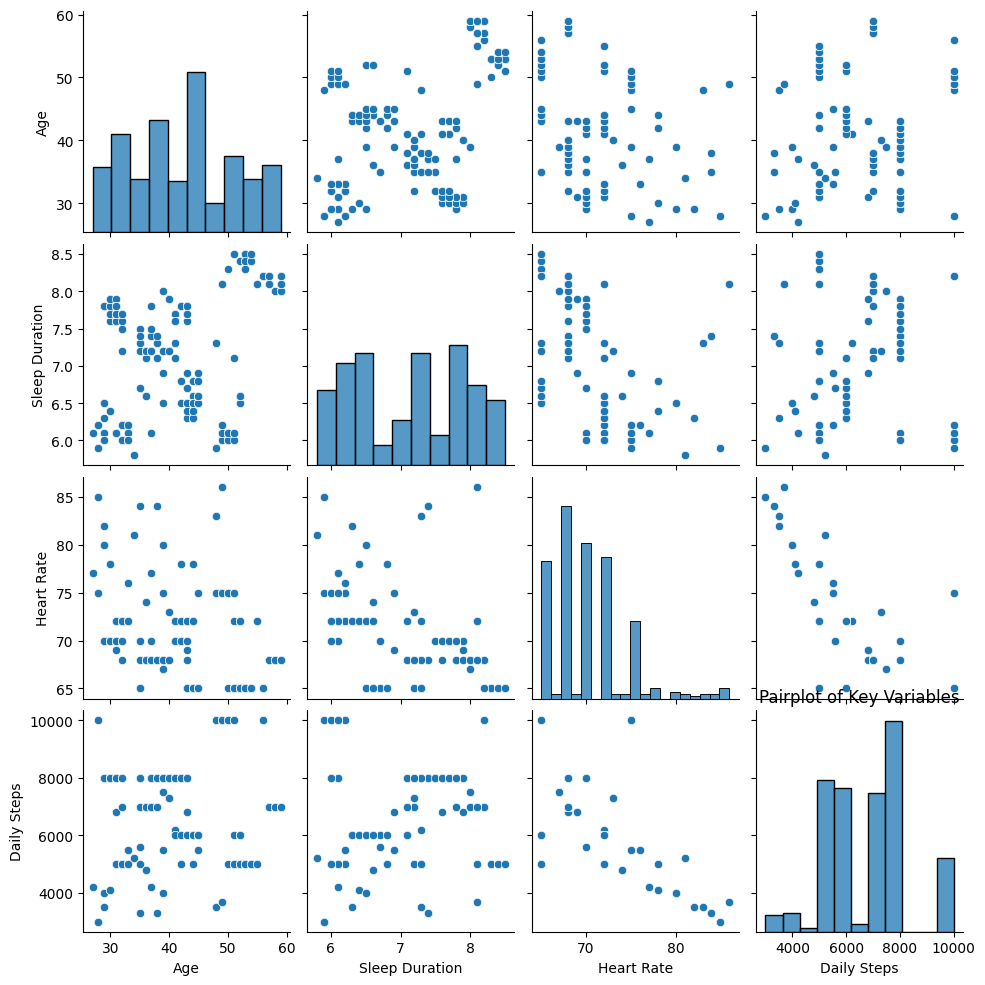

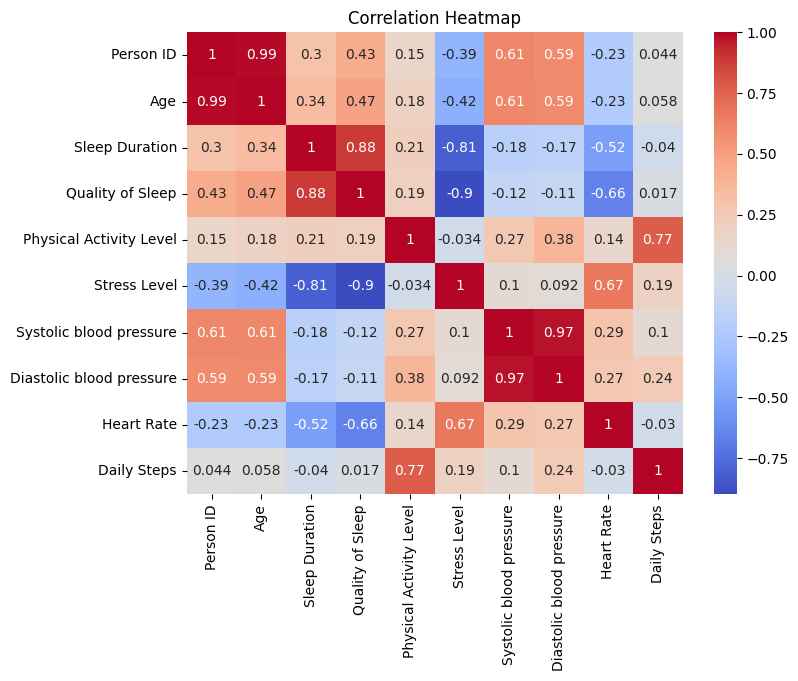

C:\Users\12465\AppData\Local\Temp\ipykernel_7792\1732268784.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Occupation', y='Sleep Duration', data=sleep_data, ci=None)


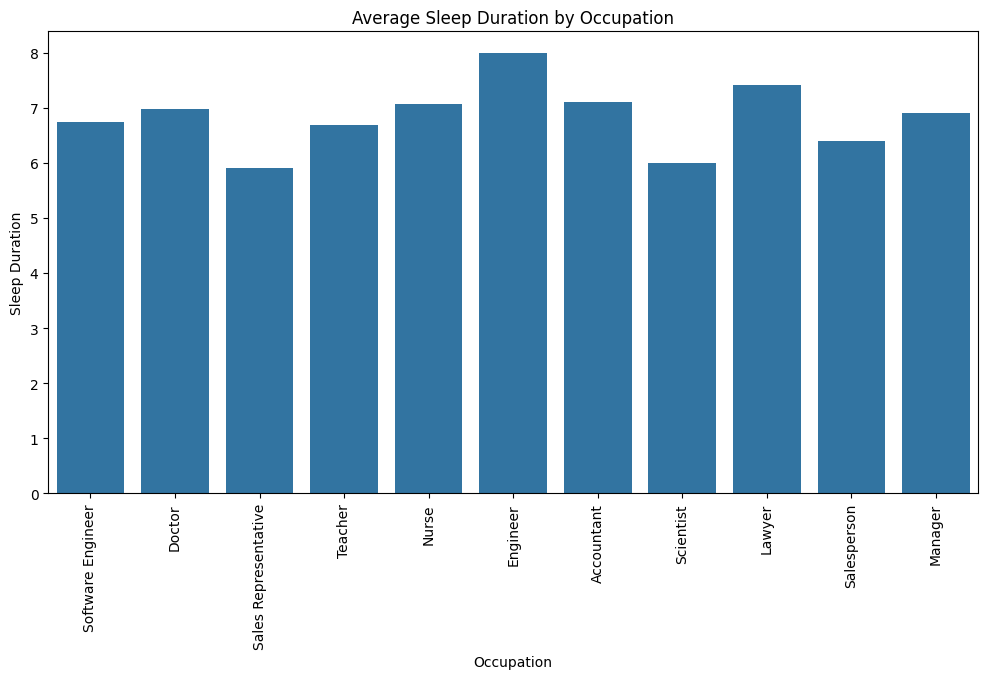

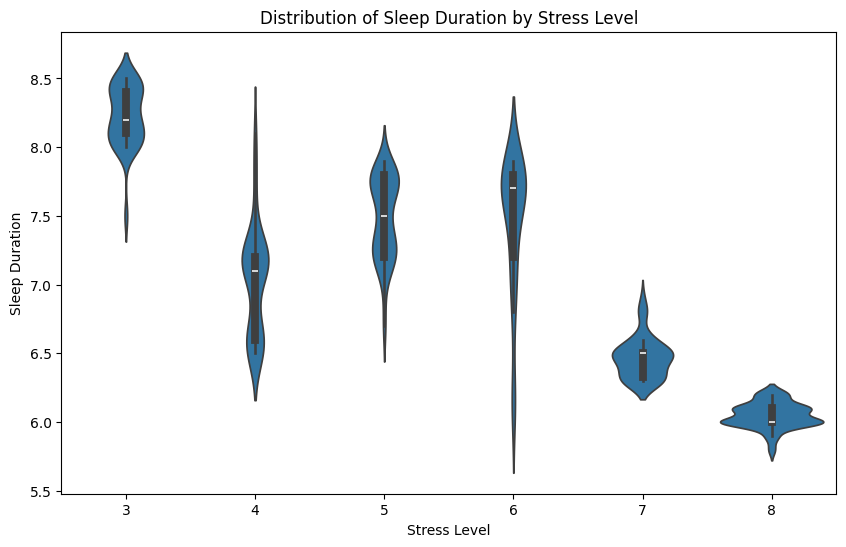

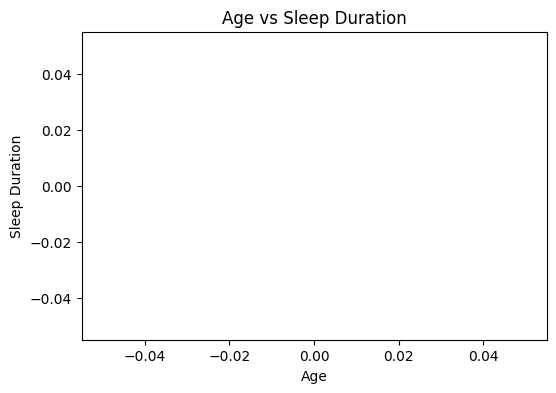

d:\python39\lib\site-packages\numpy\lib\function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
d:\python39\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
d:\python39\lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
d:\python39\lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
d:\python39\lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


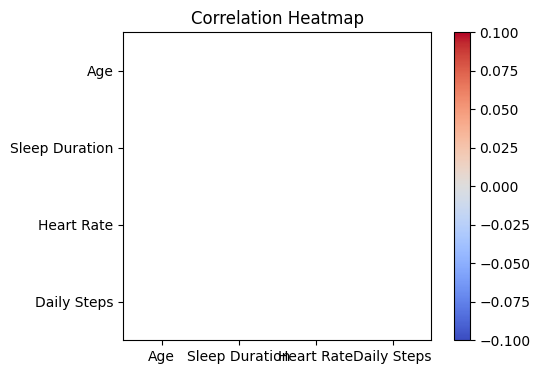

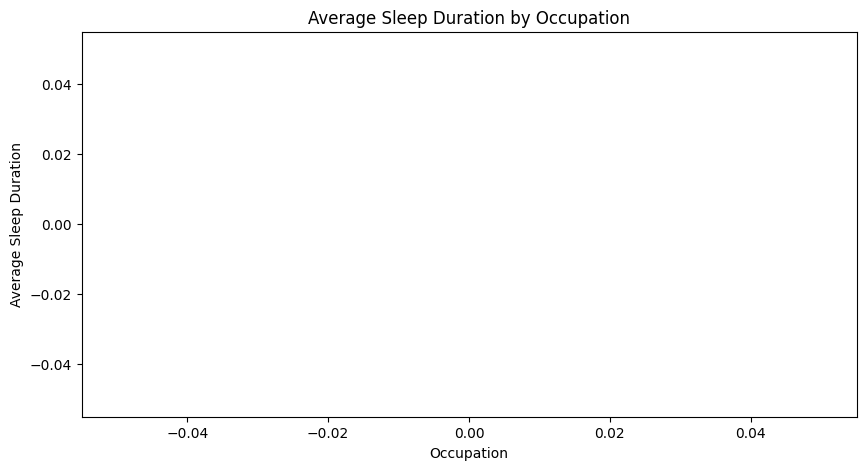

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'sleep_health.csv'
sleep_data = pd.read_csv(file_path)

numeric_data = sleep_data.select_dtypes(include=[np.number])

sns.pairplot(sleep_data[['Age', 'Sleep Duration', 'Heart Rate', 'Daily Steps']])
plt.title('Pairplot of Key Variables')
plt.show()

correlation_matrix = numeric_data.corr() 
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Occupation', y='Sleep Duration', data=sleep_data, ci=None)
plt.xticks(rotation=90)
plt.title('Average Sleep Duration by Occupation')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Stress Level', y='Sleep Duration', data=sleep_data)
plt.title('Distribution of Sleep Duration by Stress Level')
plt.show()

data = np.genfromtxt(file_path, delimiter=',', skip_header=1, dtype=float)
data = data[~np.isnan(data).any(axis=1)] 

age = data[:, 2]
sleep_duration = data[:, 4]
heart_rate = data[:, 12]
daily_steps = data[:, 13]

plt.figure(figsize=(6, 4))
plt.scatter(age, sleep_duration, alpha=0.5)
plt.title('Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.show()

correlation_matrix = np.corrcoef([age, sleep_duration, heart_rate, daily_steps])
plt.figure(figsize=(6, 4))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Correlation Heatmap')
plt.xticks(range(4), ['Age', 'Sleep Duration', 'Heart Rate', 'Daily Steps'])
plt.yticks(range(4), ['Age', 'Sleep Duration', 'Heart Rate', 'Daily Steps'])
plt.show()

occupation = data[:, 1]  
unique_occupations, occupation_counts = np.unique(occupation, return_counts=True)
avg_sleep_duration_by_occupation = [np.mean(sleep_duration[occupation == occ]) for occ in unique_occupations]

plt.figure(figsize=(10, 5))
plt.bar(unique_occupations, avg_sleep_duration_by_occupation)
plt.title('Average Sleep Duration by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Sleep Duration')
plt.show()